In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Global Earthquakes

### In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

In [2]:
earthquakes=pd.read_csv('usgs_earthquakes.csv')#,sep='\t'
earthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [3]:
earthquakes_mag50=earthquakes.sort_values('mag', ascending=False)[0:50]
earthquakes_mag50

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
37371,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.60900,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
50562,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.13300,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
36918,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.02900,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
33808,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.82800,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
31496,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.82000,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
33537,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.88500,1.00,us,usc000piqj,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
95913,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.07800,0.70,us,usb000slwn,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
31850,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.25000,1.20,us,usb000pq41,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
34318,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.72900,0.88,us,usc000pft9,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake
106285,2014-11-15 02:31:41.720,1.8929,126.5217,45.00,7.1,mww,NaN,18.0,1.39700,0.71,us,usc000sxh8,2015-03-20T18:42:02.735Z,"154km NW of Kota Ternate, Indonesia",earthquake


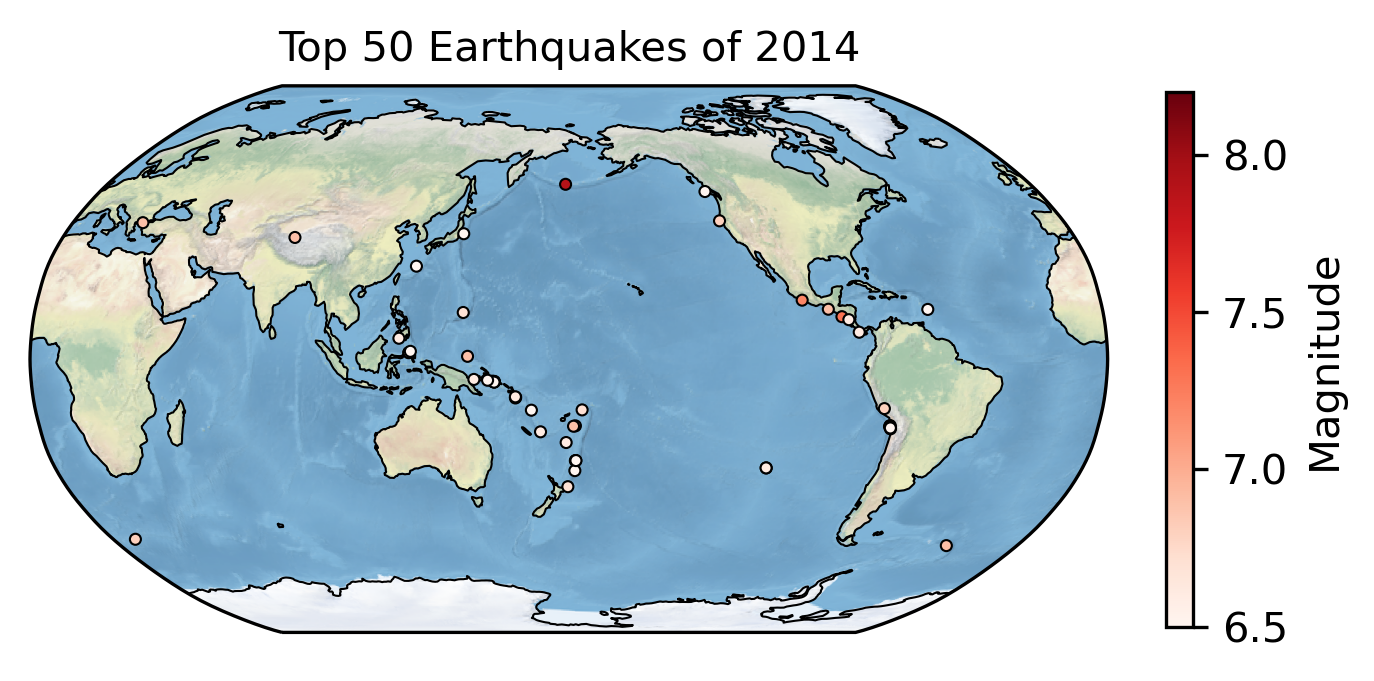

In [4]:
# Create and define the size of a figure object 
plt.figure(figsize=(5,5), dpi=300)

#projection
proj = ccrs.Robinson(central_longitude=180.0, ) #局部投影      
ax = plt.axes(projection=proj)

ax.set_global()
ax.stock_img()
ax.coastlines(linewidth=0.5)

ax_scatter=ax.scatter(x=earthquakes_mag50.longitude,
                        y=earthquakes_mag50.latitude,
                        c=earthquakes_mag50.mag,
                        s=7,
                        edgecolor='k',
                        linewidths=0.5,
                        cmap='Reds',
                        transform=ccrs.PlateCarree()) ## Important
plt.colorbar(ax_scatter,label='Magnitude',fraction=0.023,pad=0.05,)
plt.title('Top 50 Earthquakes of 2014',fontdict={'size':10})
plt.show()

# 2. Explore a netCDF dataset

### 2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

data from:  https://disc.gsfc.nasa.gov/datasets/M2TUNXGLC_5.12.4/summary?keywords=snow 

this data is about snow 

In [5]:
# Use open_mfdataset to load all the nc files
ds = xr.open_mfdataset('data/*.nc4')
ds

<xarray.Dataset>
Dimensions:    (time: 1816, lat: 361, lon: 576)
Coordinates:
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time       (time) datetime64[ns] 2001-01-01T01:30:00 ... 2020-12-01T22:30:00
Data variables:
    WESNSC     (time, lat, lon) float32 dask.array<chunksize=(8, 361, 576), meta=np.ndarray>
    RUNOFF     (time, lat, lon) float32 dask.array<chunksize=(8, 361, 576), meta=np.ndarray>
    SNOMAS_GL  (time, lat, lon) float32 dask.array<chunksize=(8, 361, 576), meta=np.ndarray>
    WESNEXT    (time, lat, lon) float32 dask.array<chunksize=(8, 361, 576), meta=np.ndarray>
    SNOWDP_GL  (time, lat, lon) float32 dask.array<chunksize=(8, 361, 576), meta=np.ndarray>
    ASNOW_GL   (time, lat, lon) float32 dask.array<chunksize=(8, 361, 576), meta=np.ndarray>
    SNICEALB   (time, lat, lon) float32 dask.array<chunksize=(8, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Wed Jun 24 06...
    Filename:                          MERRA2_300.tavgU_2d_glc_Nx.200101.nc4
    Comment:                           GMAO filename: d5124_m2_jan00.tavg3_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/7VUPQC736SWX
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2021-11-13 13:11:28 GMT Hyrax-1.16.3 h...

In [6]:
SNOMAS_GL_mean=ds.SNOMAS_GL.mean(dim=['time'])

E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


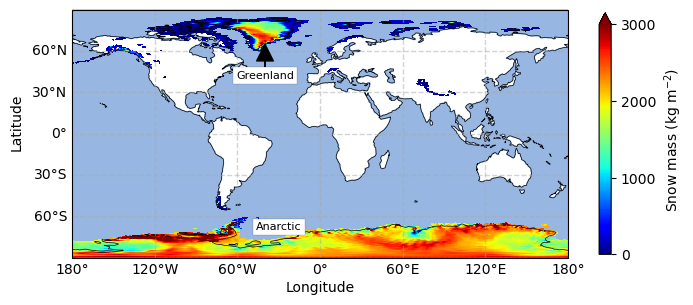

In [7]:
# Create and define the size of a figure object 
plt.figure(figsize=(8,8), dpi=100)

# plt.title('Ozone')
proj = ccrs.PlateCarree() #a project
ax = plt.axes(projection=proj)
ax.set_title('Snow mass')#title

#########################################plot
# Mask ocean data by adding ocean feature and changing its zorder
ax.coastlines(linewidth=0.5, zorder=2)
ax.add_feature(cfeature.OCEAN, zorder=1)
SNOMAS_GL_mean.plot(ax=ax, 
                    transform=ccrs.PlateCarree(),
                    cbar_kwargs={'shrink': 0.4,
                                'label':'Snow mass (kg $\mathregular{m^{-2}}$)',
                                'ticks':[0,1000,2000,3000]
                                  },
                    cmap='jet',
                    extend='max',
                    vmin=0, vmax=3000,
                   )

####################################################gridlines
# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), 
                  linewidth=1,
                  alpha=0.5,
                  color='darkgrey',
                  linestyle='--',
                 draw_labels=True,#x label and ticks,y label and ticks
                 )
gl.xlabels_top = False
gl.ylabels_right = False
# Manipulate latitude and longitude gridline numbers and spacing
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 181, 60))

##################################################annotate\text
# Annotate with Arrow Props and bbox#标记
plt.annotate('Greenland', xy=(-40, 65), xytext=(-40, 40),
             bbox=dict(boxstyle='square', fc='white', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), #加箭头
             fontsize=8, color='k', horizontalalignment='center')
# Texts 
plt.text(-30, -70,  "Anarctic", 
         bbox=dict(boxstyle='square', fc='white', linewidth=0.1),
         fontsize=8,
         transform=plt.gca().transData, horizontalalignment='center', color='k')
#######################################################
#cant solve this problem if i just use ax.set_label, so i add text
# ax.set_xlabel('Longitude')#
# ax.set_ylabel('Latitude')#Latitude
plt.text(0, -115,  "Longitude", 
         fontsize=10,
         transform=plt.gca().transData, horizontalalignment='center', color='k')
plt.text(-220, -10,  "Latitude", 
         rotation=90,
         fontsize=10,
         transform=plt.gca().transData, horizontalalignment='center', color='k')

plt.show()

### 2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [8]:
import matplotlib.path as mpath
lat_lims = [65,90]
SNOMAS_GL_mean_arctic=ds.SNOMAS_GL.mean(dim=['time']).where(ds['lat']>lat_lims[0])

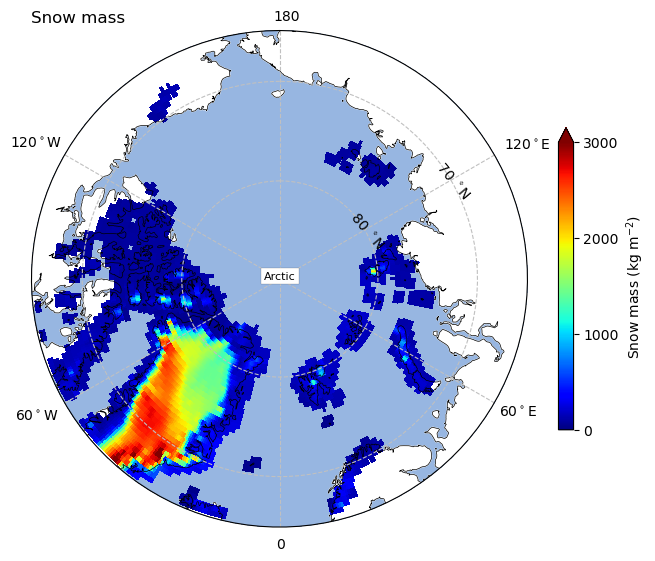

In [17]:
# Create and define the size of a figure object 
plt.figure(figsize=(8,8), dpi=100)

# plt.title('Ozone')
proj = ccrs.NorthPolarStereo() #a project
ax = plt.axes(projection=proj)
ax.set_extent([-180,180,65,90], ccrs.PlateCarree())
# Mask ocean data by adding ocean feature and changing its zorder
ax.coastlines(linewidth=0.5, zorder=2)
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.add_feature(cfeature.LAND,zorder=1,color='white')
#################################gridline
ax.gridlines(crs=ccrs.PlateCarree(), \
                  xlocs=range(-180,180,60), \
                  ylocs=range(60,90,10), \
                  linestyle="--", linewidth=0.8, color='silver')
# ######以下为网格线的参数######
theta = np.linspace(0, 2*np.pi, 120)
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
center, radius = [0.5, 0.5], 0.5
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)  #without this; get rectangle bound

############################################################### 创建要标注的labels字符串
ticks = np.arange(0, 210, 60)
etick = ['0'] + ['%d$^\circ$E' % tick for tick in ticks if (tick != 0) & (tick != 180)] + ['180']
wtick = ['%d$^\circ$W' % tick for tick in ticks if (tick != 0) & (tick != 180)]
labels = etick + wtick
# 创建与labels对应的经纬度的标注位置
xticks = [-0.8,  58,  120,181.5, -62, -116]# xticks=[i for i in np.arange(0,210,30)]+[i for i in np.arange(-32,-180,-30)]
yticks = [63] + [64]  +[64]  + [64]  + [60]+[60]
# 标注经纬度
for xtick, ytick, label in zip(xticks, yticks, labels):
    ax.text(xtick, ytick, label, transform=ccrs.Geodetic())#硬加

# for locations of longitude labels
lond = range(-180,180,60)
lond2 = 120*np.ones(len(lond))# select longitude: 240 for label positioning
latd2 = range(70,90,10)
va, ha = 'center', 'center'
for (alon, alat) in zip(lond2, latd2):
    projx1, projy1 = ax.projection.transform_point(alon, alat, ccrs.Geodetic())
    txt =  ' {0} '.format(str(int(alat)))+'$^\circ$N'
    ax.text(projx1, projy1, txt, va=va, ha=ha, color='k',rotation=-50,)

##########################################plot    
SNOMAS_GL_mean_arctic.plot(ax=ax, 
                        transform=ccrs.PlateCarree(),
                        cbar_kwargs={'shrink': 0.5,
                                'label':'Snow mass (kg $\mathregular{m^{-2}}$)',
                                'ticks':[0,1000,2000,3000]
                                  },
                        cmap='jet',
                        extend='max',
                        vmin=0, vmax=3000,
                   )
###########################################
# Annotate with Arrow Props and bbox#标记
plt.annotate('Arctic', xy=(-40, 90), xytext=(0, 90),
             bbox=dict(boxstyle='square', fc='white', linewidth=0.1),
             # arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), #加箭头
             fontsize=8, color='k', horizontalalignment='center',
            )

##################################i think that it doesn't have to have an x/y coordinate name,so i dont add it

ax.set_title('Snow mass',loc='left')#title
plt.show()